# **Introduction**

Team: Eliyahou Amsellem, Brian Livian, Mazal-tov Amsellem

There are movie reviews which were categorized as positive and negative. These reviews need to be prepared to be used in a classification model. They are currently in a free form and require processing to be utilized.


These are the steps we are taking to prepare the data for processing: 

1. Downloading the files with the reviews
2. Loading the positive and negative reviews to our Github Repository. 
3. Creating an algorithm that can read the files and classify the negative and positive reviews. 
4. Storing the two lists of positive and negative reviews. 
5. Cleaning the data of the lists by tokenizing the words ( i.e. changing run, runs, ran ... to one token run)
6. Removing any punctuation from the lists of the reviews such as periods, commas, dashes. 
7. Removing any stop words which including, and, is, he, she,.. etc..
8. Creating a term-document matrix will will provide a record for each review and within the record each token and the occurance of the token within the review.

*The notes from module 12 impacted our results and were used as a source of reference for this entire assignment.*

# **Data Preparation**

* Transform the provided data into properly labeled count vectors within a Pandas-based Term-Document matrix.

In [1]:
#importing all the required packages to complete the various tasks. 
import pandas as pd
import numpy as np
import urllib.request
import re
import requests
import nltk
nltk.download('all', halt_on_error=False)
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
en_stops = set(stopwords.words('english'))


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Brian\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Brian\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\Brian\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\Brian\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\Brian\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     C:\Users\B

[nltk_data]    |   Package reuters is already up-to-date!
[nltk_data]    | Downloading package rte to
[nltk_data]    |     C:\Users\Brian\AppData\Roaming\nltk_data...
[nltk_data]    |   Package rte is already up-to-date!
[nltk_data]    | Downloading package semcor to
[nltk_data]    |     C:\Users\Brian\AppData\Roaming\nltk_data...
[nltk_data]    |   Package semcor is already up-to-date!
[nltk_data]    | Downloading package senseval to
[nltk_data]    |     C:\Users\Brian\AppData\Roaming\nltk_data...
[nltk_data]    |   Package senseval is already up-to-date!
[nltk_data]    | Downloading package sentiwordnet to
[nltk_data]    |     C:\Users\Brian\AppData\Roaming\nltk_data...
[nltk_data]    |   Package sentiwordnet is already up-to-date!
[nltk_data]    | Downloading package sentence_polarity to
[nltk_data]    |     C:\Users\Brian\AppData\Roaming\nltk_data...
[nltk_data]    |   Package sentence_polarity is already up-to-date!
[nltk_data]    | Downloading package shakespeare to
[nltk_data]  

In [2]:
# webscrape my github page for all the negative reviews
req = urllib.request.Request('https://github.com/brianlivian/AIM-5001/tree/master/neg')
response = urllib.request.urlopen(req)
the_page = response.read()
neg = str(the_page)

# webscrape my github page for all the positive reviews
req = urllib.request.Request('https://github.com/brianlivian/AIM-5001/tree/master/pos')
response = urllib.request.urlopen(req)
the_page = response.read()
pos = str(the_page)


In [3]:
# regex to pull names of negative files
neglist1 = re.findall("/cv[0-9]+_[0-9]+.txt", neg)
neglist1 = str(neglist1)
neglist = re.findall("cv[0-9]+_[0-9]+.txt", neglist1)

# regex to pull names of positive files
poslist1 = re.findall("/cv[0-9]+_[0-9]+.txt", pos)
poslist1 = str(poslist1)
poslist = re.findall("cv[0-9]+_[0-9]+.txt", poslist1)

In [4]:
# extract txt data from each of the 'raw' url's
posurl = []
negurl = []
for name in poslist:
    posurl.append('https://raw.githubusercontent.com/brianlivian/AIM-5001/master/pos/' + str(name))
for name in neglist:
    negurl.append('https://raw.githubusercontent.com/brianlivian/AIM-5001/master/neg/' + str(name))


In [5]:
# create lists for all positive and negative reviews
# expect this to take about 5 minutes
# the program accesses 2000 url's
positive = []
negative = []
for i in range(1000):
    r = requests.get(posurl[i])
    positive.append(r.text)
for i in range(1000):
    r = requests.get(negurl[i])
    negative.append(r.text)


In [6]:
import string
#Below we create a method for building a list of uniform proper words absent of any stop words.
def remove_stop_punc(words):
    words_clean = []
 
    # iterate through each word in the text document
    for word in words:
        # convert all characters to lowercase for consistency
        word = word.lower()
        # if the word is not a stop word and is not a punctuation character add it to clean word list
       # not all the punctuations were in the string punctuation list, so to clean the data we added some of our own
        if word not in en_stops and word not in string.punctuation and word not in "'re" and word not in '``' and word not in "'s" and word not in "n't":
            words_clean.append(word)
            
    return words_clean

In [7]:
#tokenize each positive and negative review by word
posreviews = []
negreviews = []

for i in range(len(positive)):
    token = nltk.word_tokenize(positive[i])
    posreviews.append(token)
for i in range(len(negative)):
    token = nltk.word_tokenize(negative[i])
    negreviews.append(token)

In [8]:
#use the function created "remove_stop_punc" to clean out the review words

cleannegreviews = []
cleanposreviews = []
for words in negreviews:
    cleannegreviews.append(remove_stop_punc(words))
for words in posreviews:
    cleanposreviews.append(remove_stop_punc(words))

In [9]:
#create two lists for positive and negative reviews this will later be converted to a dataframe
posfreq = []
negfreq = []
for i in range(len(cleanposreviews)):
    posfreq.append(nltk.FreqDist(cleanposreviews[i]))
for i in range(len(cleannegreviews)):
    negfreq.append(nltk.FreqDist(cleannegreviews[i]))

In [10]:
#The term document matrix for the positive reviews 
posdf = pd.DataFrame(posfreq)
posdf.index = poslist

In [11]:
#The term document matrix for the negative reviews 
negdf = pd.DataFrame(negfreq)
negdf.index = neglist

In [12]:
negdf

,plot,two,teen,couples,go,church,party,drink,drive,get,...,butabis,fortenberry,koren,_21_jump_street_,obeys,rift,messiness,stonily,_jerry_maguire_,_have_
cv000_29416.txt,1.0,2.0,4.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cv001_19502.txt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cv002_17424.txt,2.0,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cv003_12683.txt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cv004_12641.txt,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cv995_23113.txt,2.0,1.0,NaN,NaN,1.0,6.0,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cv996_12447.txt,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cv997_5152.txt,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cv998_15691.txt,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
posdf

,films,adapted,comic,books,plenty,success,whether,superheroes,batman,superman,...,cage-world,snoots,obstructions,obscuring,tangerine,timbre,powaqqatsi,keyboardist,capitalized,clicked
cv000_29590.txt,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cv001_18431.txt,3.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cv002_15918.txt,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cv003_11664.txt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cv004_11636.txt,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cv995_21821.txt,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cv996_11592.txt,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cv997_5046.txt,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cv998_14111.txt,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Calculate Matrix Sparsity**
 
 
*   Transform your Pandas dataframe to a NumPy array.

*   Calculate the sparsity of your term-document matrix.

In [14]:
#Below we replace all 'NaN' values with zeroes and create a numpy array from our dataframe's data
posdf.fillna(0, inplace=True)
posdf.to_numpy()

array([[1., 1., 5., ..., 0., 0., 0.],
       [3., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 1., 1.]])

In [15]:
#Below we replace all 'NaN' values with zeroes and create a numpy array from our dataframe's data
negdf.fillna(0, inplace=True)
negdf.to_numpy()

array([[1., 2., 4., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [2., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 2., 0., ..., 1., 2., 1.]])

In [16]:
#We compute the sparsity by the formula: Sparsisty = 1- (number of nonzeros/total elements)
from numpy import count_nonzero
sparsity = 1.0 - ( count_nonzero(posdf) / float(posdf.size) )
print(sparsity)

0.9917414739202266


In [17]:
from numpy import count_nonzero
sparsity = 1.0 - ( count_nonzero(negdf) / float(negdf.size) )
print(sparsity)

0.9920133475372854


# **Frequency Distribution Plots**

* Present your word count frequency distribution plots for the positive and negative reviews. 

In [18]:
#get the frequency distribution of the words in negative reviews
allwords = []
for review in cleannegreviews:
    for word in review:
        allwords.append(word)

In [19]:
# how many non-stopwords are found within the 1000 negative reviews?
len(allwords)

330877

In [20]:
# how many distinct non-stopwords are found across the 1000 negative reviews?
len(nltk.FreqDist(allwords))

31916

In [21]:
# what is the frequency distribution of the distinct words?
negfreq = nltk.FreqDist(allwords)
negfreq

FreqDist({'film': 4257, 'movie': 3174, 'one': 2639, 'like': 1833, 'even': 1381, 'would': 1185, 'good': 1126, 'time': 1111, 'get': 1039, 'bad': 1019, ...})

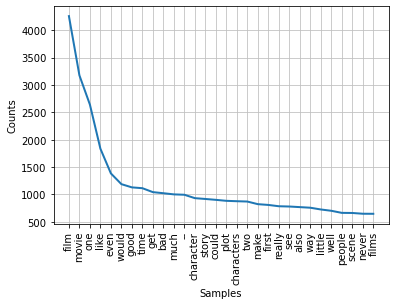

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [22]:
# plot the frequency distribution of the top 30 words from the set of negative reviews
plot_neg_freq = negfreq.plot(30, cumulative=False)
plot_neg_freq

In [23]:
# get the frequency distribution of the words in positive reviews
allwords = []
for review in cleanposreviews:
    for word in review:
        allwords.append(word)

In [24]:
# how many non-stopwords are found within the 1000 positive reviews?
len(allwords)

371916

In [25]:
# how many distinct non-stopwords are found across the 1000 positive reviews?
len(nltk.FreqDist(allwords))

33896

In [26]:
# what is the frequency distribution of the distinct words?

posfreq = nltk.FreqDist(allwords)
posfreq

FreqDist({'film': 5186, 'one': 2943, 'movie': 2497, 'like': 1714, 'story': 1232, 'also': 1200, 'good': 1190, 'even': 1175, 'time': 1171, 'would': 1079, ...})

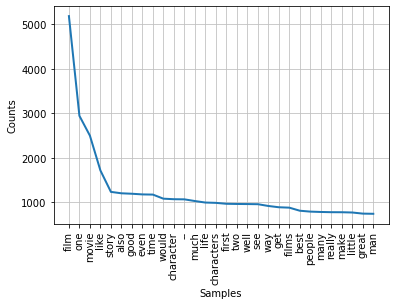

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [27]:
# plot the frequency distribution of the top 30 words from the set of positive reviews
plot_pos_freq = posfreq.plot(30, cumulative=False)
plot_pos_freq

# **Sentiment Analysis Model Preparation**

* Present the process by which you separated the count vectors into training and testing subsets.

Now that you have successfully constructed and properly labeled the term-document matrix entries for each of the 2000 individual movie reviews, randomly sample 75% of the vectors contained within the term-document matrix for use as a model training data subset while leaving the remaining 25% of the vectors for the model testing data subset.


 How you choose to split the data is up to you as the data science / Python practitioner to decide. Be sure to display samples of your training and testing subsets to a reader of your work. 
 
 
 Also, tell us how many documents are contained within your training subset? How many documents are contained in your testing subset? 
 
 How many positive and negative reviews are contained within each subset? 
 
 
 Does the mix of positive and negative reviews appear to be relatively balanced within each of the subsets? Be sure to provide a suitable explanatory narrative in the form of formatted Markdown cells.

In [28]:
# load the string library: will be used to help remove punctuation
import string

# feature extractor function
def feature_extractor(words):
    ''' this function removes English language stop words + punctuation from 
    a provided list of character strings and then creates a dictionary using
    the remaining words. The dictionary is comprised of key:value pairs wherein
    the key is a word from the list and the value is the Python keyword True. The True
    keyword MUST be used as the value to enable the use of the NLTK naive bayes classifier function.'''
    
    # define a new list to store the words we will retain from the 'words' list
    words_clean = []
 
    # iterate through each word in the list
    for word in words:
        # convert all characters to lowercase for consistency
        word = word.lower()
        
        # if the word is not a stop word and is not a punctuation character add it to clean word list      
        if word not in en_stops and word not in string.punctuation:
            words_clean.append(word)
    
    words_dictionary = dict([word, True] for word in words_clean)
    
    return words_dictionary

In [29]:
# positive reviews feature set
pos_reviews_set = []
for words in posreviews:
    pos_reviews_set.append((feature_extractor(words), 'pos'))
    
# negative reviews feature set
neg_reviews_set = []
for words in negreviews:
    neg_reviews_set.append((feature_extractor(words), 'neg'))

In [30]:
# import the 'shuffle' function: we will randomize the order of the reviews 
from random import shuffle 
shuffle(cleannegreviews)
shuffle(cleanposreviews)

# take 12.5% of positive + 12.5% of negative reviews to create a testing data set
test_set = pos_reviews_set[:125] + neg_reviews_set[:125]
# randomize the testing data set
shuffle(test_set)

# take 37.5% of positive + 37.5% of negative reviews to create a training data set
train_set = pos_reviews_set[375:] + neg_reviews_set[375:]
# randomize the training data set
shuffle(train_set)

In [31]:
# load the naive bayes classifier + the classify library
from nltk import classify
from nltk import NaiveBayesClassifier
 
# train the Naive Bayes classifier using a training set
classifier = NaiveBayesClassifier.train(train_set)

# now apply the naive bayes classifier to the test data set and check the accuracy of the result
accuracy = classify.accuracy(classifier, test_set)
print(accuracy)

0.64


Below we portray some insights derived from the dataset. For each word we have the correlating probability of that word being within a positive movie review as opposed to negetive. The pos:neg column describes the order of the ratio an the column to its left is the probability. 

We bifurcated the training and testing set by taking the 75% for training and splitting it in half having 37.5% positive reviews of the 1000 reviews and having 37.5% negative reviews of the 100 reviews. We used the same approach for the testing data set and split the remaining 25% of the set in half.

In [35]:
# display the 30 most informative features as determined by the Naive Bayes classifier
print (classifier.show_most_informative_features(30))

Most Informative Features
                everyday = True              pos : neg    =     12.3 : 1.0
                   sucks = True              neg : pos    =     12.3 : 1.0
                  finest = True              pos : neg    =     11.8 : 1.0
            breathtaking = True              pos : neg    =     11.0 : 1.0
               ludicrous = True              neg : pos    =      9.8 : 1.0
                 spoiled = True              neg : pos    =      9.7 : 1.0
                  avoids = True              pos : neg    =      9.0 : 1.0
                    coen = True              pos : neg    =      9.0 : 1.0
               feel-good = True              pos : neg    =      9.0 : 1.0
                gripping = True              pos : neg    =      9.0 : 1.0
               maintains = True              pos : neg    =      9.0 : 1.0
                  sloppy = True              neg : pos    =      9.0 : 1.0
               top-notch = True              pos : neg    =      9.0 : 1.0